# Chapter 15: Cluster Analysis

## Import required packages

In [1]:
!pip install dmba

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

import dmba

## Load the data

In [3]:
# define utilities_df, load the dataset: Utilities.csv
utilities_df = pd.read_csv('Utilities.csv')

# preview utilities_df
utilities_df.head()

# Fixed-charge covering ratio
# Rate of return on capital
# Cost per kilowatt capacity
# Annual load factor
# Growth in peak demand
# Sales
# % nuclear
# Fuel costs per kwh

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [4]:
# update utilities_df, using set_index() to set the Company column as the index 
utilities_df = utilities_df.set_index('Company')


In [5]:
# preview utilities_df again, check info()

utilities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Arizona  to Virginia
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fixed_charge   22 non-null     float64
 1   RoR            22 non-null     float64
 2   Cost           22 non-null     int64  
 3   Load_factor    22 non-null     float64
 4   Demand_growth  22 non-null     float64
 5   Sales          22 non-null     int64  
 6   Nuclear        22 non-null     float64
 7   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.5+ KB


In [6]:
# check column names / index names

utilities_df.index

Index(['Arizona ', 'Boston ', 'Central ', 'Commonwealth', 'NY', 'Florida ',
       'Hawaiian ', 'Idaho', 'Kentucky', 'Madison ', 'Nevada', 'New England',
       'Northern', 'Oklahoma', 'Pacific ', 'Puget', 'San Diego', 'Southern',
       'Texas', 'Wisconsin', 'United', 'Virginia'],
      dtype='object', name='Company')

In [7]:
# update index names by removing trailing spaces

utilities_df.index = [i.strip() for i in utilities_df.index]

## Compute Euclidean distance matrix

In [8]:
# use pairwise.pairwise_distances() for utilities_df (consider all variables)
# setting: metric='euclidean' (this is the default one)
# define d to store the result
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')

# convert d to a dataframe
# settings: index=utilities_df.index, columns=utilities_df.index (index and columns are the same)
pd.DataFrame(d, index=utilities_df.index, columns=utilities_df.index)


,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030
Madison,2622.699002,1367.090634,2758.559663,43.648894,3155.095594,4672.829286,1187.941143,6627.291780,1951.628580,0.000000,...,724.096182,3219.825109,53.301401,9536.242192,744.253668,3685.510088,7052.723883,833.472995,199.228400,3638.097548


## Standardize the variables

In [9]:
# define scaler, to use StandardScaler()
scaler = StandardScaler()

# use fit_transform() for utilities_df
# convert to a dataframe, define utilities_df_norm
# settings: index=utilities_df.index, columns=utilities_df.columns; columns are different from index
# preview it
utilities_df_norm = pd.DataFrame(scaler.fit_transform(utilities_df), index=utilities_df.index, columns=utilities_df.columns)

utilities_df_norm.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [10]:
# focus on the two columns: Sales and Fuel Cost, as a subset from utilities_df_norm
# define utilities_df_norm2, preview it

utilities_df_norm2 = utilities_df_norm[['Sales', 'Fuel_Cost']]
utilities_df_norm2.head()

,Sales,Fuel_Cost
Arizona,0.046983,-0.873765
Boston,-1.103127,0.832436
Central,0.085906,-0.082323
Commonwealth,-0.718219,-0.741244
NY,-1.618644,1.732470


C:\Users\orlan\AppData\Local\Temp\ipykernel_2484\2859244735.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i], txt, va='bottom')


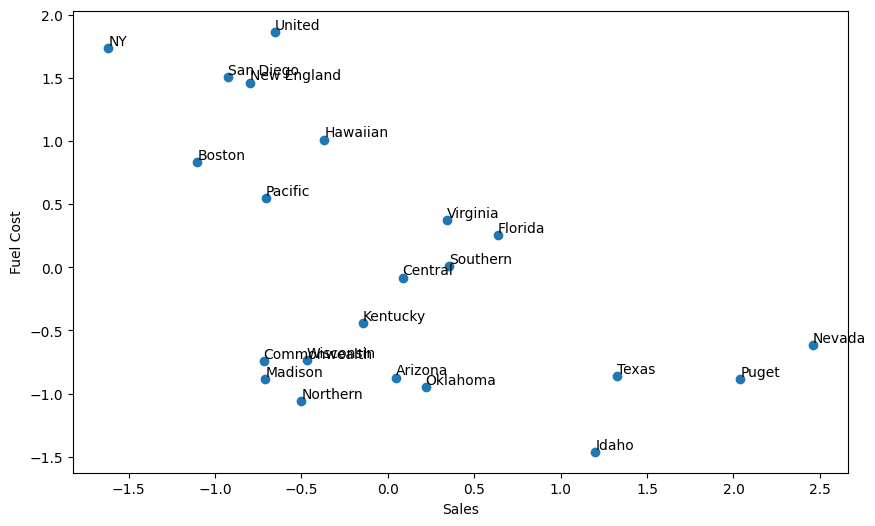

In [11]:
# optional, set a big figure with plt.figure(), use figsize=(10, 6)
plt.figure(figsize=(10, 6))

# create a scatter plot, with plt.scatter()
# x as utilities_df_norm2.Sales; y as utilities_df_norm2.Fuel_Cost
# xlabel as 'Sales'; ylabel as 'Fuel Cost'
plt.scatter(utilities_df_norm2.Sales, utilities_df_norm2.Fuel_Cost)
plt.xlabel('Sales')
plt.ylabel('Fuel Cost')
# use for ... in enumerate() to go through each item from utilities_df_norm2.index
# i, txt: i as the numerical index; txt as the actual index from from utilities_df_norm2.index
# use plt.text() to add text annotations to a plot
# x as utilities_df_norm2.Sales[i]; y as utilities_df_norm2.Fuel_Cost[i]
# the string is txt; use va='bottom', va is vertical alighment
for i, txt in enumerate(utilities_df_norm2.index):
    # print(i, txt, utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i])
    plt.text(utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i], txt, va='bottom')


In [12]:
# preview utilities_df_norm2 again

utilities_df_norm2.head()

,Sales,Fuel_Cost
Arizona,0.046983,-0.873765
Boston,-1.103127,0.832436
Central,0.085906,-0.082323
Commonwealth,-0.718219,-0.741244
NY,-1.618644,1.732470


In [13]:
# use for loop and enumerate() to print (i, txt)
for i, txt in enumerate(utilities_df_norm2.index):
    print(i, txt, utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i])

# add utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i] into the print()

0 Arizona 0.046983111270480306 -0.8737646823867813
1 Boston -1.1031267573138428 0.8324357133041431
2 Central 0.08590635826443459 -0.0823232906423394
3 Commonwealth -0.7182190925958505 -0.7412442633039912
4 NY -1.6186435397226595 1.732470226241427
5 Florida 0.6380398248823786 0.25449944119308593
6 Hawaiian -0.3667565882578485 1.0109701667906799
7 Idaho 1.201706105424457 -1.4609037613785882
8 Kentucky -0.14647984230687763 -0.443073320367713
9 Madison -0.7089928414565427 -0.8829674892675307
10 Nevada 2.4584945028070253 -0.6160860897258003
11 New England -0.7957772662356557 1.461907703947397
12 Northern -0.5002489094297065 -1.0596613813779177
13 Oklahoma 0.21882203874008585 -0.9473871374327759
14 Pacific -0.7052446769311991 0.5471487000009141
15 Puget 2.040429998057146 -0.8884891733959802
16 San Diego -0.9226382194011362 1.5042406155988437
17 Southern 0.3534676413043573 0.009704778165153916
18 Texas 1.3242422533683873 -0.8590401913775824
19 Wisconsin -0.4691103118345431 -0.7375631405516914

C:\Users\orlan\AppData\Local\Temp\ipykernel_2484\850751104.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(i, txt, utilities_df_norm2.Sales[i], utilities_df_norm2.Fuel_Cost[i])


In [14]:
# use pairwise.pairwise_distances() for utilities_df_norm2
# setting: metric='euclidean'
# define d_norm to store the result
d_norm = pairwise.pairwise_distances(utilities_df_norm2, metric='euclidean')
d_norm
# convert d_norm to a dataframe
# settings: index=utilities_df.index, columns=utilities_df.index; index and columns are the same
# sort_values('NY')
d_norm = pd.DataFrame(d_norm, index=utilities_df_norm2.index, columns=utilities_df_norm2.index)


<Axes: >

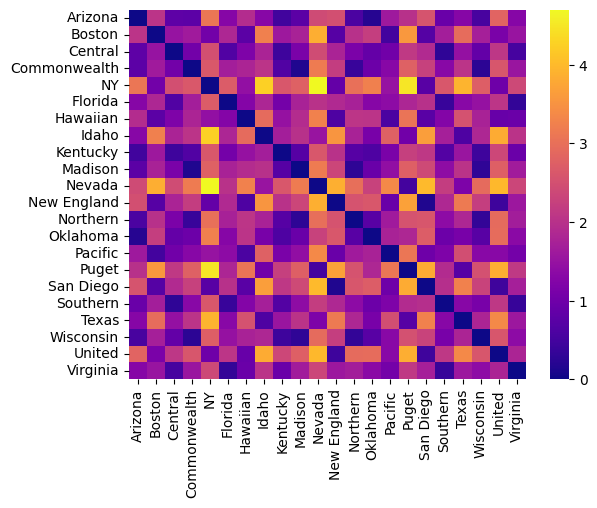

In [15]:
# create a heatmap for the dataframe
# optional: cmap='plasma'

sns.heatmap(d_norm, cmap='plasma')

**---- Back to PPT ----**

## Hierarchical clustering

### Dendrogram

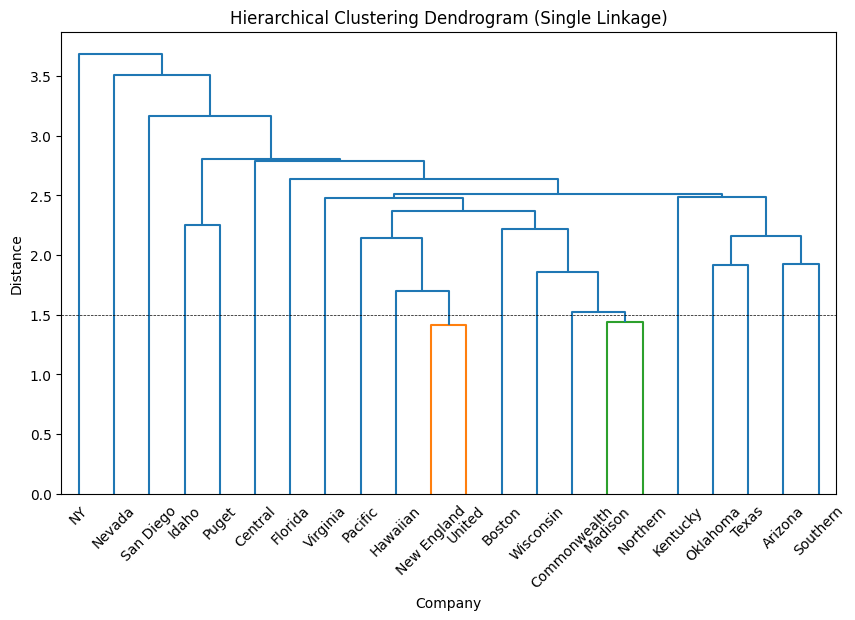

In [16]:
# use linkage() for utilities_df_norm, perform hierarchical clustering
# no need to use the distance matrix, which has been computed internally
# setting: method='single', define z1 to store it
z1 = linkage(utilities_df_norm, method='single')

# optional, set a big figure with fig=plt.figure(), use figsize=(10, 6)
# fig.subplots_adjust(bottom=0.23)
plt.figure(figsize=(10, 6))

# use dendrogram() for z1
# setting: labels=utilities_df_norm.index, color_threshold=2.75
# below 2.75, use different colors for clusters
# the default color_threshold=0.7 * max(z1[:, 2])
dendrogram(z1, labels=utilities_df_norm.index, color_threshold=1.5)

# add a horizontal line, using plt.axhline(), with y=2.75
# setting: color='black', linewidth=0.5, linestyle='dashed'

plt.axhline(y=1.5, color='black', linewidth=0.5, linestyle='dashed')
# plt.title(), the title is 'Hierarchical Clustering Dendrogram (Single Linkage)'
# plt.xlabel(), x axis is 'Company'
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Company')
plt.ylabel('Distance')
# plt.show()
plt.show()


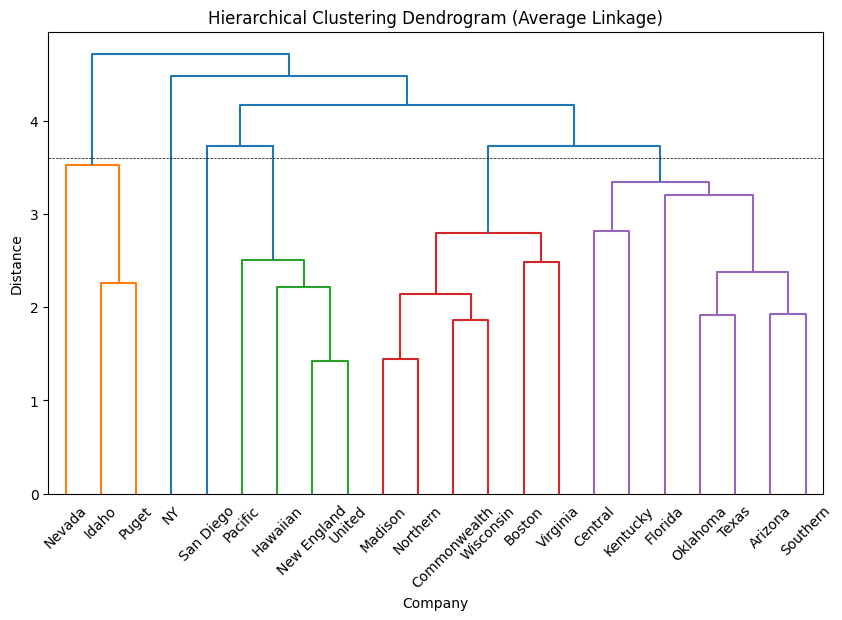

In [17]:
# use linkage() for utilities_df_norm
# setting: method='average', define z2 to store it
z2 = linkage(utilities_df_norm, method='average')

# optional, set a big figure with fig=plt.figure(), use figsize=(10, 6)
# fig.subplots_adjust(bottom=0.23)
plt.figure(figsize=(10, 6))

# use dendrogram() for z2
# setting: labels=utilities_df_norm.index, color_threshold=3.6
# below 3.6, use different colors for clusters
# the default color_threshold=0.7 * max(z2[:, 2])
dendrogram(z2, labels=utilities_df_norm.index, color_threshold=3.6)

# add a horizontal line, with y=3.6
# setting: color='black', linewidth=0.5, linestyle='dashed'
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')

# plt.title(), the title is 'Hierarchical Clustering Dendrogram (Average Linkage)'
# plt.xlabel, x axis is 'Company'
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Company')
plt.ylabel('Distance')

# plt.show()
plt.show()

### Flat clusters

In [18]:
# use fcluster(), for z1=linkage(utilities_df_norm, 'single'), to get flat clusters
# setting: 6, criterion='maxclust' (want to have 6 clusters)
# define member as the result
member = fcluster(z1, 6, criterion='maxclust')

# update member by converting it into a dataframe
# setting: index=utilities_df_norm.index, columns=['cluster']
# use sort_values() to sort the cluster column
member = pd.DataFrame(member, index=utilities_df_norm.index, columns=['cluster']).sort_values('cluster')

# preview member
member.head()

,cluster
Puget,1
Idaho,1
Arizona,2
Wisconsin,2
Texas,2


In [19]:
# use fcluster(), for z2=linkage(utilities_df_norm, 'average')
# setting: 6, criterion='maxclust' (want to have 6 clusters)
# define member as the result
member = fcluster(z2, 6, criterion='maxclust')

# update member by converting it into a dataframe
# setting: index=utilities_df_norm.index, columns=['cluster']
# use sort_values() to sort the cluster column
member = pd.DataFrame(member, index=utilities_df_norm.index, columns=['cluster']).sort_values('cluster')

# preview member
member.head()


,cluster
Nevada,1
Puget,1
Idaho,1
Pacific,2
Hawaiian,2


In [20]:
# to list clusters and items in each cluster
# look at two elements (key, item) in member.groupby('cluster')
# print three things together: (1) key, (2) ': ', (3) ', '.join(item.index) (print them one by one to understand)
# ', '.join(item.index) is to join the index of item, separated by comma and space

for key, item in member.groupby('cluster'):
    print('Cluster', key, ': ', ', '.join(item.index))

Cluster 1 :  Nevada, Puget, Idaho
Cluster 2 :  Pacific, Hawaiian, New England, United
Cluster 3 :  San Diego
Cluster 4 :  Wisconsin, Northern, Virginia, Commonwealth, Boston, Madison
Cluster 5 :  Kentucky, Florida, Oklahoma, Central, Southern, Texas, Arizona
Cluster 6 :  NY


In [21]:
for key, item in member.groupby('cluster'):
    print('Cluster', key, ': ', ', '.join(item.index))

Cluster 1 :  Nevada, Puget, Idaho
Cluster 2 :  Pacific, Hawaiian, New England, United
Cluster 3 :  San Diego
Cluster 4 :  Wisconsin, Northern, Virginia, Commonwealth, Boston, Madison
Cluster 5 :  Kentucky, Florida, Oklahoma, Central, Southern, Texas, Arizona
Cluster 6 :  NY


**---- Back to PPT ----**

## Nonhierarchical clustering

In [28]:
# Load data: Utilities.csv
# define utilities_df and update it, with se_index() on 'Company'
# update utilities_df.index by removing the trailing spaces
utilities_df = pd.read_csv('Utilities.csv')
utilities_df =  utilities_df.set_index('Company')
utilities_df.index = [i.strip() for i in utilities_df.index]

# Standardize distance, with StandardScaler()
# define scaler for it
# define utilities_df_norm, after converting utilities_df to a dataframe, set index & columns
scaler = StandardScaler()
utilities_df_norm = pd.DataFrame(scaler.fit_transform(utilities_df), index=utilities_df.index, columns=utilities_df.columns)
utilities_df_norm.head()


# use KMeans(), which is unsupervised
# not KNeighborsClassifier(), which is supervised
# setting: n_clusters=6, random_state=1
# fit it with utilities_df_norm, define kmeans to store the result
kmeans = KMeans(n_clusters=6, random_state=1).fit(utilities_df_norm)

In [36]:
# Cluster membership
# create a dataframe, with kmeans.labels_
# setting: index=utilities_df_norm.index, columns=['cluster']
# define the result as member
member = pd.DataFrame(kmeans.labels_, index=utilities_df_norm.index, columns=['cluster'])
member
# to list the clusters and items in each cluster
# look at two elements (key, item) in member.groupby('cluster')
# print three things together: (1) key, (2) ': ', (3) ', '.join(item.index)
# ', '.join(item.index) is to join the index of item, separated by comma and space
for key, item in member.groupby('cluster'):
    print('cluster', key,' ,'.join(item.index))


cluster 0 Commonwealth ,Madison ,Northern ,Wisconsin
cluster 1 Arizona ,Nevada ,Oklahoma ,Southern ,Texas ,Virginia
cluster 2 Central ,Florida
cluster 3 Idaho ,Kentucky ,Puget
cluster 4 San Diego
cluster 5 Boston ,NY ,Hawaiian ,New England ,Pacific ,United
